In [110]:
import numpy as np
import pandas as pd

x = 1 #magnitude multiplier (removed as it fucked the clipping)
upper = 150
lower = -100  # Arbitrary bounds set to limit sortino and sterling from extreem values


def sharpe_ratio(return_window: np.array):

    mean = np.mean(return_window)
    stddev = np.std(return_window)

    sharpe = mean / (stddev + 1e-8)
    #sharpe = sharpe * x
    sharpe = np.clip(sharpe, lower, upper) # Redundant, but gives equality to measurements
    if np.isnan(sharpe):
        return 0.0 

    return sharpe  



def return_ratio(return_window: np.array):
    
    #cumu = (np.cumprod(return_window+1)-1)[-1]
    mean = np.mean(return_window)
    #mean = mean * x
    mean = np.clip(mean, lower, upper) # Redundant, but gives equality to measurements

    if np.isnan(mean):
        return 0.0 

    return mean 



def sortino_ratio(return_window: np.array):

    mean = np.mean(return_window)
    downside_risk = np.sqrt(np.mean(np.square(np.minimum(return_window, 0))))

    sortino = mean / (downside_risk + 1e-8)
    #sortino = sortino * x
    sortino = np.clip(sortino, lower, upper) # Currently arbitrary

    if np.isnan(sortino):
        return 0.0 

    return sortino 


def sterling_ratio(return_window: np.array):

    mean = np.mean(return_window)

    cumu = (np.cumprod(return_window +1))
    peak = np.maximum.accumulate(cumu)
    drawdown = (cumu - peak)/peak
    #avg_drawdown = np.mean(-drawdown[drawdown < 0]) 
    negative_drawdowns = drawdown[drawdown < 0]
    if negative_drawdowns.size == 0:
        avg_drawdown = 0.0  # Returns maximum sterling, given returns
    else:
        avg_drawdown = np.mean(-negative_drawdowns)

    sterling = mean / (avg_drawdown + 1e-8)
    #sterling = sterling * x
    sterling = np.clip(sterling, lower, upper)

    if np.isnan(sterling):
        return 0.0 

    return sterling 


def penalise_reward(reward_window, esg_score):

    penalty = 0.3 * (esg_score) 
   
    penalised_reward = reward_window - penalty     
    return penalised_reward

In [111]:
returns = np.array([-0.01,-0.01,-0.01,-0.01,-0.01])
sterling = sterling_ratio(returns)
sortino = sortino_ratio(returns)
sharpe = sharpe_ratio(returns)
returnss = return_ratio(returns)
print(sterling)
print(sortino)
print(sharpe)
print(returnss)

-0.4040198765658664
-0.9999990000010001
-100.0
-0.01


150.0


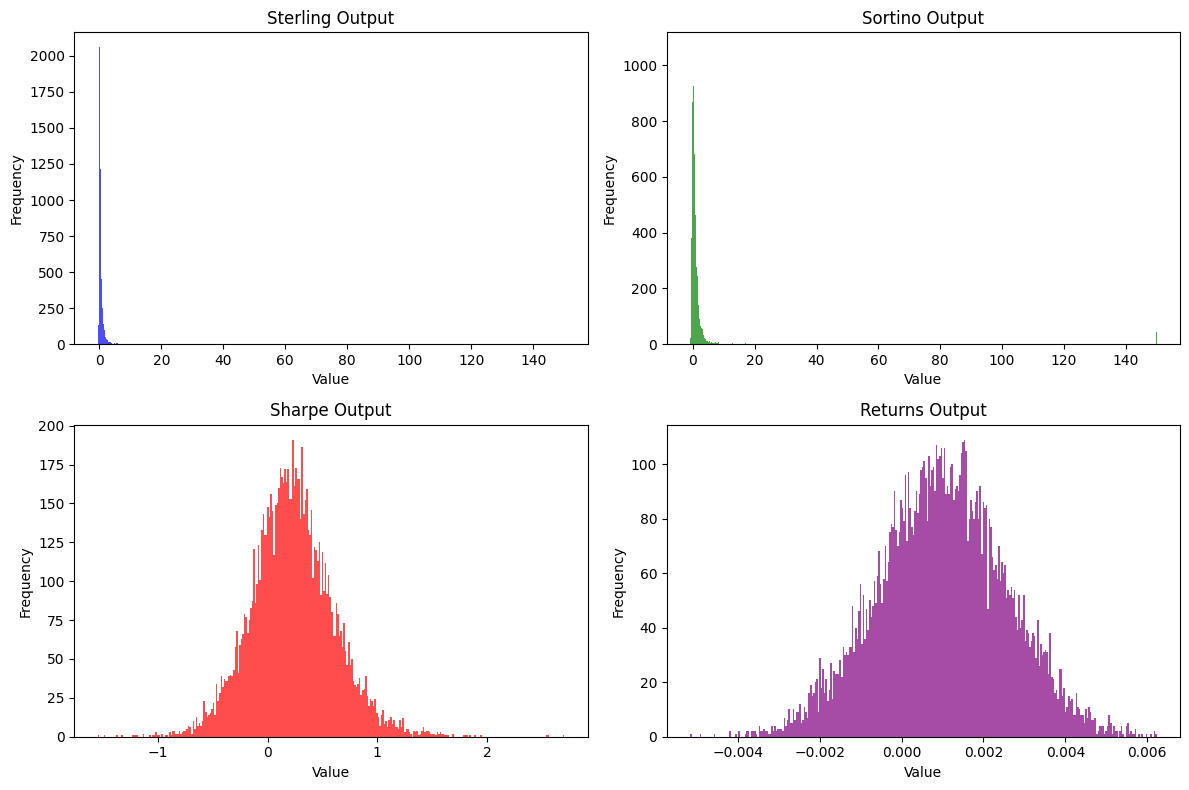

In [112]:
import matplotlib.pyplot as plt
# Simulation Parameters
num_simulations = 10000  # number of simulations
# Store the outputs
outputs_func_1 = []
outputs_func_2 = []
outputs_func_3 = []
outputs_func_4 = []

# Run the simulation
for x in range(num_simulations):
    sample = np.random.normal(loc=0.001, scale=0.005, size=10)
    sample = np.clip(sample, -0.5, 0.6)
    outputs_func_1.append(sterling_ratio(sample))
    outputs_func_2.append(sortino_ratio(sample))
    outputs_func_3.append(sharpe_ratio(sample))
    outputs_func_4.append(return_ratio(sample))

# Convert the outputs into numpy arrays for easy handling
outputs_func_1 = np.array(outputs_func_1)
outputs_func_2 = np.array(outputs_func_2)
outputs_func_3 = np.array(outputs_func_3)
outputs_func_4 = np.array(outputs_func_4)
print(max(outputs_func_1))

# Plot the histograms
plt.figure(figsize=(12, 8))

# Plot each function's output
plt.subplot(2, 2, 1) 
plt.hist(outputs_func_1, bins=1000, color='blue', alpha=0.7)
plt.title("Sterling Output") 
plt.xlabel("Value")
plt.ylabel("Frequency") 

plt.subplot(2, 2, 2)
plt.hist(outputs_func_2, bins=1000, color='green', alpha=0.7)
plt.title("Sortino Output")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
plt.hist(outputs_func_3, bins=300, color='red', alpha=0.7)
plt.title("Sharpe Output")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.hist(outputs_func_4, bins=300, color='purple', alpha=0.7)
plt.title("Returns Output")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()

In [87]:
outputs_func_1

array([ 0.00000000e+00, -5.16449163e-02,  1.30523031e+00, ...,
       -7.62413726e+02,  3.78201807e+04, -2.93230687e+02])